# DSP2: Midterm Group Project

### Topic:   Car Price Prediction 

### Deadline: until 5 week

### Goal of a project: Use regression model and implement into our data model and see score test.

### Context
With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.

### Group members BD-2005 students : Adilkhan M. , Assanali K. , Zhanibek B.

## Data Description


Train.csv - 19237 rows x 18 columns (Includes Price Columns as Target)

Attributes
* ID
* Price: price of the care(Target Column)
* Levy
* Manufacturer
* Model
* Prod. year
* Category
* Leather interior
* Fuel type
* Engine volume
* Mileage
* Cylinders
* Gear box type
* Drive wheels
* Doors
* Wheel
* Color
* Airbags

Test.csv - 8245 rows x 17 columns 



# Data preparation


### Import libraries

For data manipulation and analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

For beautiful visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# !pip install xgboost

For work with ML

In [4]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

### Loading and Checking Dataset

In [5]:
data = pd.read_csv('train.csv', na_values='-')
data.head(50)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394.0,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [6]:
data.shape

(19237, 18)

Data cleaning/preparation steps:
From the above dataframe we can see that:

1)The 'Levy' column contains '-' symbol.We need to look into this column.

2)In the 'Doors' column there are month names which we need to remove.

3)In the 'MIleage' column there is 'km' written, we need to seperate this 'km' for model building purpose.

4)Dropping duplicates 

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Levy,13418.0,9.068381e+02,461.867051,87.0,640.0,781.0,1058.0,11714.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


## Data cleaning

### Checking for single value columns

In [8]:
data.nunique()

ID                  18924
Price                2315
Levy                  558
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [9]:
#data.drop('ID', axis=1, inplace=True)

In [10]:
#data[data.duplicated(keep=False)]
data.loc[data.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,NaN,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,NaN,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,NaN,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,NaN,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,NaN,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273.0,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642.0,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640.0,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645.0,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [11]:
data.drop_duplicates(keep='last',inplace=True)

In [12]:
data.reset_index()

,index,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
2,3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
3,4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
4,5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
18920,19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
18921,19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
18922,19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [13]:
data["ID"].loc[data.duplicated()].count() #proof testing the removal of duplicates

0

In [14]:
#Feature Engineering
data["Age"] = 2022 - data["Prod. year"]
data["Age"] = data["Age"].astype(int)
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,11
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,8
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,6


We can see that there is no columns with single value

### Filling missing values with imputation

In [15]:
data.isnull().sum()

ID                     0
Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Age                    0
dtype: int64

We see that Levy column has 5819 missing values. We will fill them with the mean value

In [16]:
data['Levy'].fillna(data.Levy.mean(), inplace=True)
data['Levy']=round(data['Levy'],1)
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Age                 0
dtype: int64

In [17]:
data["Levy"].value_counts()

906.3     5709
765.0      482
891.0      453
639.0      403
640.0      398
          ... 
3273.0       1
2909.0       1
3739.0       1
2628.0       1
3292.0       1
Name: Levy, Length: 559, dtype: int64

#### Preparing mileage column

In [18]:
data.Mileage

0        186005 km
2        200000 km
3        168966 km
4         91901 km
5        160931 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

In [19]:
mileage=data.Mileage.apply(lambda x: int(x.split(' ')[0]))
data['Mileage']=mileage
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12
2,45774419,8467,906.3,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,11
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,8
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906.3,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,23
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,11
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,12
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,15


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

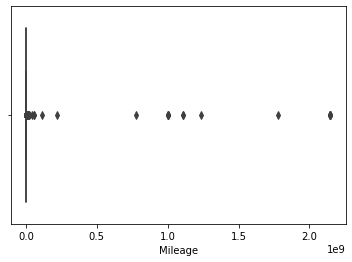

In [20]:
sns.boxplot(data["Mileage"])

In [21]:
index = data.query('Mileage==0 and Age>0').index
index

Int64Index([   11,    24,    26,    83,    97,   122,   125,   182,   187,
              214,
            ...
            18922, 18987, 19016, 19043, 19047, 19064, 19088, 19103, 19218,
            19223],
           dtype='int64', length=714)

In [22]:
mill = np.mean(data['Mileage'])
data.loc[index,'Mileage'] = mill

In [23]:
data.shape

(18924, 19)

#### Preparing column Engine volume

In [24]:
data['Engine volume'].unique()

array(['3.5', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '3', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '4.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo',
       '2.6', '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo',
       '5.7', '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

### There is a Turbo mode in data. Let's create column isTurbo and convert column Engine volume to float type

In [25]:
turbo=data['Engine volume'].str.contains('Turbo').astype(int)
data['isTurbo']=turbo
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,isTurbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12,0
2,45774419,8467,906.3,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16,0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,11,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,8,0
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931.0,4.0,Automatic,Front,04-May,Left wheel,White,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906.3,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,23,1
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,11,0
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,12,0
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,15,0


In [26]:
engineVolume=data['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
data['Engine volume']=engineVolume
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,isTurbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12,0
2,45774419,8467,906.3,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16,0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,11,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,8,0
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,04-May,Left wheel,White,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906.3,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,23,1
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,11,0
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,12,0
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,15,0


In [27]:
data["Engine volume"].unique()

array([ 3.5,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,  4.7,
        1.5,  3. ,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,  1.2,
        5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,  2.1,
        0.7,  5.4,  4.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine volume'>

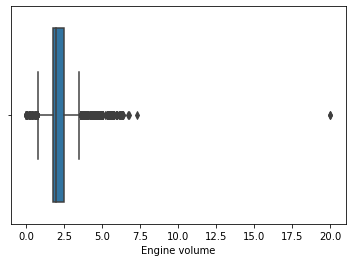

In [28]:
sns.boxplot(data["Engine volume"])

In [29]:
data.drop(data[data["Engine volume"]>10].index,axis=0,inplace=True)
data.shape

(18922, 20)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18922 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18922 non-null  int64  
 1   Price             18922 non-null  int64  
 2   Levy              18922 non-null  float64
 3   Manufacturer      18922 non-null  object 
 4   Model             18922 non-null  object 
 5   Prod. year        18922 non-null  int64  
 6   Category          18922 non-null  object 
 7   Leather interior  18922 non-null  object 
 8   Fuel type         18922 non-null  object 
 9   Engine volume     18922 non-null  float64
 10  Mileage           18922 non-null  float64
 11  Cylinders         18922 non-null  float64
 12  Gear box type     18922 non-null  object 
 13  Drive wheels      18922 non-null  object 
 14  Doors             18922 non-null  object 
 15  Wheel             18922 non-null  object 
 16  Color             18922 non-null  object

In [31]:
# dropping id
data.drop('ID', axis=1, inplace=True)

Using get dummies for columns that have unique values < 12
and label encoder fro those > 12

# Data Modelling

### Preprocessing of categorical and numerical columns

In [32]:
from sklearn.preprocessing import LabelEncoder

dum_categorical = [i for i in data.columns if data[i].dtype=='O' and data[i].nunique()<12]
numerical = [i for i in data.columns if data[i].dtype!='O']

print(dum_categorical)
print(numerical)

['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel']
['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age', 'isTurbo']


In [33]:
label_encoder = LabelEncoder()
le_categorical=[i for i in data.columns if data[i].dtype=='O' and data[i].nunique()>=12]
for column in le_categorical:
    data[column]=label_encoder.fit_transform(data[column])
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,isTurbo
0,13328,1399.0,32,1242,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,12,12,12,0
2,8467,906.3,21,684,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,1,2,16,0
3,3607,862.0,16,661,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,14,0,11,0
4,11726,446.0,21,684,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,12,4,8,0
5,39493,891.0,23,1305,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,04-May,Left wheel,14,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.3,36,385,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,12,5,23,1
19233,15681,831.0,23,1334,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,11,8,11,0
19234,26108,836.0,23,1442,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,7,4,12,0
19235,5331,1288.0,8,456,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,1,4,15,0


In [34]:
# dummy_columns
data = pd.get_dummies(data, columns=dum_categorical)
data

,Price,Levy,Manufacturer,Model,Prod. year,Engine volume,Mileage,Cylinders,Color,Airbags,...,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,13328,1399.0,32,1242,2010,3.5,186005.0,6.0,12,12,...,0,0,1,0,0,0,1,0,1,0
2,8467,906.3,21,684,2006,1.3,200000.0,4.0,1,2,...,0,1,0,1,0,0,1,0,0,1
3,3607,862.0,16,661,2011,2.5,168966.0,4.0,14,0,...,0,0,1,0,0,0,1,0,1,0
4,11726,446.0,21,684,2014,1.3,91901.0,4.0,12,4,...,0,0,0,1,0,0,1,0,1,0
5,39493,891.0,23,1305,2016,2.0,160931.0,4.0,14,4,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906.3,36,385,1999,2.0,300000.0,4.0,12,5,...,0,0,0,0,1,1,0,0,1,0
19233,15681,831.0,23,1334,2011,2.4,161600.0,4.0,11,8,...,1,0,0,1,0,0,1,0,1,0
19234,26108,836.0,23,1442,2010,2.0,116365.0,4.0,7,4,...,0,0,0,1,0,0,1,0,1,0
19235,5331,1288.0,8,456,2007,2.0,51258.0,4.0,1,4,...,0,0,0,1,0,0,1,0,1,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

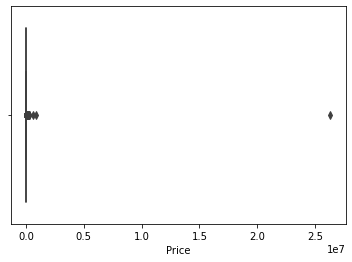

In [35]:
sns.boxplot(data['Price'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

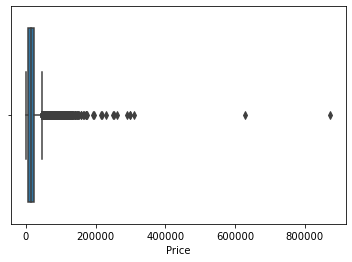

In [36]:
sns.boxplot(data[data['Price']<26000000]['Price'])

In [37]:
index = data.loc[data["Price"]>600000].index
data.drop(index,axis=0,inplace=True)


In [38]:
data.shape

(18919, 44)

# EDA

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

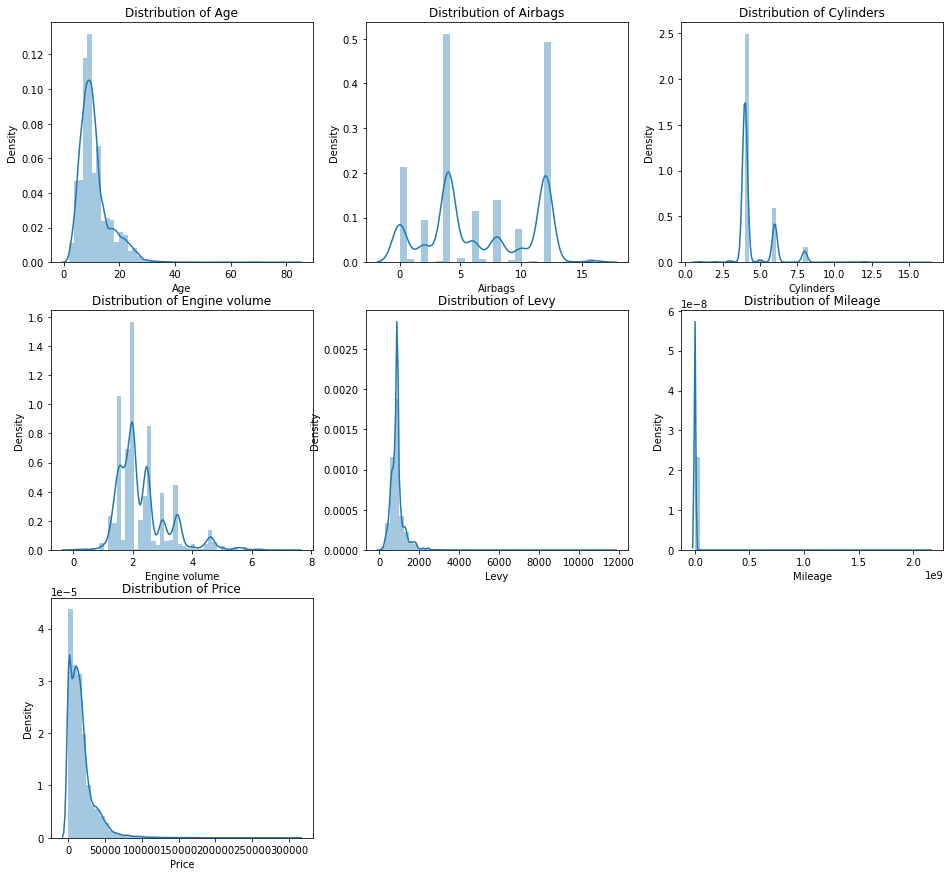

In [39]:
ncols = ["Age","Airbags","Cylinders","Engine volume","Levy","Mileage","Price"]
plt.figure(figsize=(16,15))
for i,col in enumerate(ncols):
    plt.subplot(3,3,i+1).set_title("Distribution of "+col)
    sns.distplot(data[col])

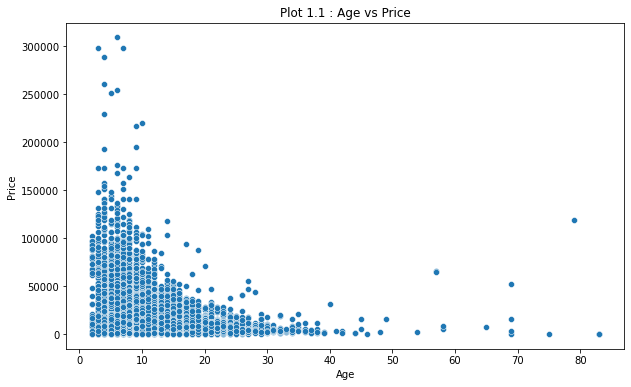

In [40]:
plt.figure(figsize=(10,6))
plt.title("Plot 1.1 : Age vs Price")
sns.scatterplot(x='Age',y='Price',data=data)
plt.show()

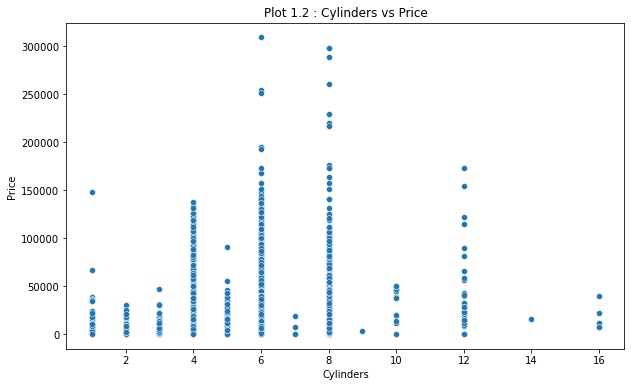

In [41]:
plt.figure(figsize=(10,6))
plt.title("Plot 1.2 : Cylinders vs Price")
sns.scatterplot(x='Cylinders',y='Price',data=data)
plt.show()

<AxesSubplot:title={'center':'Plot 1.3 : Mileage vs Price'}, xlabel='Mileage', ylabel='Price'>

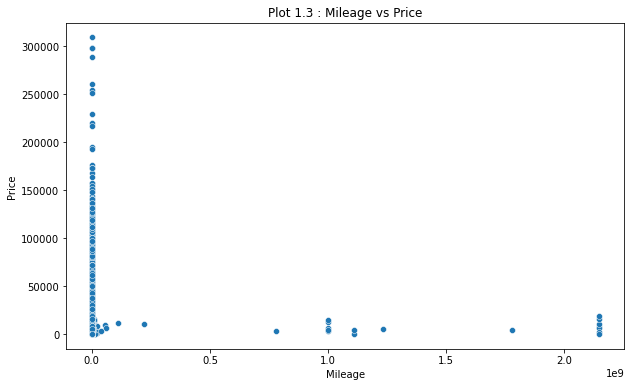

In [42]:
plt.figure(figsize=(10,6))
plt.title("Plot 1.3 : Mileage vs Price")
sns.scatterplot(x="Mileage",y="Price",data=data)

In [43]:
#data['Price'] = np.log(data['Price']+1)
#data['Price']

In [44]:
X=data.drop(['Price'],axis=1)
# X=data[['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'isTurbo']]
y=data['Price']

In [45]:
#Test-Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
#Shapes
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(13243, 43) (5676, 43) (13243,) (5676,)


In [47]:
X_train

,Levy,Manufacturer,Model,Prod. year,Engine volume,Mileage,Cylinders,Color,Airbags,Age,...,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
12753,1058.0,36,601,2012,3.5,128202.0,6.0,1,12,10,...,0,0,0,0,1,0,1,0,1,0
9232,751.0,28,1079,2013,2.4,230032.0,4.0,12,12,9,...,0,0,0,1,0,0,1,0,1,0
8682,1750.0,58,847,2008,3.3,226094.0,6.0,14,12,14,...,0,0,1,0,0,0,1,0,1,0
1716,707.0,54,248,2011,2.0,181000.0,4.0,12,4,11,...,0,0,0,1,0,0,1,0,1,0
8638,1079.0,26,679,2018,2.0,26726.0,4.0,2,12,4,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,1017.0,61,893,2017,2.0,131200.0,4.0,7,10,5,...,1,0,0,1,0,0,1,0,1,0
82,1187.0,21,481,2014,1.4,16000.0,8.0,14,10,8,...,0,0,1,0,0,0,1,0,0,1
12387,1053.0,36,601,2014,3.5,146395.0,6.0,7,12,8,...,0,0,0,0,1,0,1,0,1,0
14431,585.0,58,1154,2013,1.8,149000.0,4.0,1,0,9,...,0,0,0,1,0,0,1,0,1,0


## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr = lr.fit(X_train,y_train)

In [49]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
lr_score_train = r2_score(y_train,y_pred_train)
lr_score_test = r2_score(y_test,y_pred_test)

In [50]:
print('R2 score for train set: {0} & R2 score for test set: {1}'.format(lr_score_train, lr_score_test))

R2 score for train set: 0.2790351395687374 & R2 score for test set: 0.2875850544175522


In [51]:
# rmsle_train_lr = np.sqrt(mean_squared_log_error(y_train,y_pred_train))
# rmsle_test_lr = np.sqrt(mean_squared_log_error(y_test,y_pred_test))
# print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train_lr,rmsle_test_lr))

In [52]:
result = pd.DataFrame({'Algorithm used':['Linear Regression'],'R2score of train data':[lr_score_train],
                       'R2score of test data':[lr_score_test]})
result

,Algorithm used,R2score of train data,R2score of test data
0,Linear Regression,0.279035,0.287585


In [53]:
lr.score(X, y)

0.28150948291860967

## DecisionTreeRegressor

In [54]:
from sklearn.model_selection import train_test_split
#Performing Train-test split on original data frame
#X = data.drop('Price',axis=1)
#y = data['Price']

#Split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100,shuffle=True)

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,
                      min_samples_leaf=5,
                          criterion='friedman_mse')
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=5)

In [56]:
from sklearn.metrics import mean_squared_log_error, r2_score
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)
print('R2 score for train set: {0} & R2 score for test set: {1}'.format(r2_score_train,r2_score_test))

R2 score for train set: 0.8031835028467917 & R2 score for test set: 0.5811999136515633


In [57]:
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train,rmsle_test))

RMSLE score for train set: 0.9719998200257413 & RMSLE score for test set: 1.1186833289053397


In [58]:
result.loc[len(result)] = ['Decission Trees Regressor', r2_score_train ,r2_score_test]

## ExtraTreesRegressor

In [59]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=15, n_jobs=-1, oob_score=False,
                    random_state=3892, verbose=0, warm_start=False)

In [60]:
extra_reg.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=15, n_jobs=-1, random_state=3892)

In [61]:
predictions_train = extra_reg.predict(X_train)
predictions_train

array([ 4861.,   470.,   941., ...,  1176., 10349., 18503.])

In [62]:
print('R2SCORE(Train):', r2_score(y_train,predictions_train))

R2SCORE(Train): 0.9889104313407234


In [63]:
predictions_valid = extra_reg.predict(X_test)
predictions_valid

array([  251.        , 12785.13333333,  8423.13333333, ...,
        6726.86666667, 13905.2       , 10861.33333333])

In [64]:
print('R2 score for train set: {0} & R2 score for test set: {1}'.format( r2_score(y_train,predictions_train),
                                                                        r2_score(y_test,predictions_valid)))

R2 score for train set: 0.9889104313407234 & R2 score for test set: 0.7122880337797823


In [65]:
rmsle_train = np.sqrt(mean_squared_log_error(y_train, predictions_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, predictions_valid))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train,rmsle_test))

RMSLE score for train set: 0.2089577715840422 & RMSLE score for test set: 1.0068964755052265


In [66]:
result.loc[len(result)] = ['Extra Trees Regressor',r2_score(y_train,predictions_train),r2_score(y_test,predictions_valid)]

In [67]:
result

,Algorithm used,R2score of train data,R2score of test data
0,Linear Regression,0.279035,0.287585
1,Decission Trees Regressor,0.803184,0.581200
2,Extra Trees Regressor,0.988910,0.712288


## KNeighborsRegressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [69]:
knn = KNeighborsRegressor()

In [70]:
trainpredict_knn = knn.fit(X_train, y_train)
#testpredict_kkn = knn.fit(X_test)


In [71]:
trainpredict_knn1 = trainpredict_knn.predict(X_train)


In [72]:
testpredict_kkn = trainpredict_knn.predict(X_test)


In [73]:
print('R2 score for train set: {0} & R2 score for test set: {1}'.format( r2_score(y_train, trainpredict_knn1),
                                                                        r2_score(y_test,testpredict_kkn)))

R2 score for train set: 0.7309106523651161 & R2 score for test set: 0.5412609753044118


In [74]:
rmsle_train = np.sqrt(mean_squared_log_error(y_train, trainpredict_knn1))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, testpredict_kkn))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train,rmsle_test))

RMSLE score for train set: 0.9993328987878302 & RMSLE score for test set: 1.1672565800477028


In [75]:
result.loc[len(result)] = ['KNeighborsRegressor',r2_score(y_train, trainpredict_knn1),r2_score(y_test,testpredict_kkn)]

In [76]:
result

,Algorithm used,R2score of train data,R2score of test data
0,Linear Regression,0.279035,0.287585
1,Decission Trees Regressor,0.803184,0.581200
2,Extra Trees Regressor,0.988910,0.712288
3,KNeighborsRegressor,0.730911,0.541261


In [77]:
#!pip install scikit-optimize

In [78]:
#from skopt import BayesSearchCV

#knn = KNeighborsRegressor()

#search_space_knn = {
#    'n_neighbors':list(range(2,20)),
#    'weights':['uniform','distance']
#}

#opt = BayesSearchCV(knn,search_spaces=search_space_knn,n_iter=40,n_points=8,cv=5,n_jobs=-1,verbose=True,scoring='neg_mean_squared_error')

In [79]:
#opt.fit(X_train, y_train)

## RandomForest

In [80]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor()
r_forest.fit(X_train,y_train)

RandomForestRegressor()

In [81]:
y_result_forest = r_forest.predict(X_test)

In [82]:
y_train_forest =  r_forest.predict(X_train)

In [83]:
print('R-squared training data: ', r_forest.score(X_train, y_train))
print('R-squared test data: ', r_forest.score(X_test, y_test))

R-squared training data:  0.9525982908149412
R-squared test data:  0.692021684142688


In [84]:
# rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_forest))
# rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_result_forest))
# print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train,rmsle_test))

In [85]:
result.loc[len(result)] = ['RandomForest', r_forest.score(X_train, y_train),r_forest.score(X_test, y_test)]

In [86]:
result

,Algorithm used,R2score of train data,R2score of test data
0,Linear Regression,0.279035,0.287585
1,Decission Trees Regressor,0.803184,0.581200
2,Extra Trees Regressor,0.988910,0.712288
3,KNeighborsRegressor,0.730911,0.541261
4,RandomForest,0.952598,0.692022


In [87]:
result

,Algorithm used,R2score of train data,R2score of test data
0,Linear Regression,0.279035,0.287585
1,Decission Trees Regressor,0.803184,0.581200
2,Extra Trees Regressor,0.988910,0.712288
3,KNeighborsRegressor,0.730911,0.541261
4,RandomForest,0.952598,0.692022


In [88]:
result.sort_values(by='R2score of test data', ascending=False)

,Algorithm used,R2score of train data,R2score of test data
2,Extra Trees Regressor,0.988910,0.712288
4,RandomForest,0.952598,0.692022
1,Decission Trees Regressor,0.803184,0.581200
3,KNeighborsRegressor,0.730911,0.541261
0,Linear Regression,0.279035,0.287585


# Conclusion

In this notebook, we analyzes **Car Price Prediction** dataset that have been taken from **Kaggle**. Some model have been evaluated which those are **Linear Regression**, **RandomForest**, **Decision tree**, **Extra Trees** and **KNN**. **Extra Trees** give us best accuracy with 98,9% in train model and 71.2% in test model and **RandomForest** 
give us best accuracy with 95,12% in train model and 69.1% in test model.So we only used default parameters in that model for our submission. During in CV(cross validation our laptop crashes in KNN). That's why we just comment this block of code and use default values